In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount = True)

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Capstone_Project/API_Kaggle"

In [ ]:
!kaggle datasets download sriramr/fruits-fresh-and-rotten-for-classification

100% 3.58G/3.58G [00:23<00:00, 135MB/s]
100% 3.58G/3.58G [00:23<00:00, 164MB/s]


In [ ]:
import zipfile

local_zip = r'/content/fruits-fresh-and-rotten-for-classification.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')

In [ ]:
dataset_dir = '/tmp/dataset/'
dataset_train_dir = os.path.join(dataset_dir, 'train')
dataset_test_dir = os.path.join(dataset_dir, 'test')

print('Address Train Dataset : {}'.format(dataset_train_dir))
print('Address Test Dataset : {}'.format(dataset_test_dir))

Address Train Dataset : /tmp/dataset/train
Address Test Dataset : /tmp/dataset/test


In [ ]:
list_train_dataset = os.listdir(dataset_train_dir)
print('List Dataset Train : {}'.format(list_train_dataset))

list_test_dataset = os.listdir(dataset_test_dir)
print('List Dataset Test : {}'.format(list_test_dataset))

List Dataset Train : ['freshoranges', 'rottenoranges', 'rottenapples', 'freshbanana', 'rottenbanana', 'freshapples']
List Dataset Test : ['freshoranges', 'rottenoranges', 'rottenapples', 'freshbanana', 'rottenbanana', 'freshapples']


In [ ]:
def total_num_files(PATH, DIRECTORY):
  selected_dir = os.path.join(PATH, DIRECTORY)
  number_of_files = len(os.listdir(selected_dir))
  return number_of_files

In [ ]:
print('Total Number of Files in Train Dataset :')
for fruit_classification in list_train_dataset:
  print('{} folder : {} file'.format(fruit_classification, total_num_files(dataset_train_dir, fruit_classification)))

Total Number of Files in Train Dataset :
freshoranges folder : 1466 file
rottenoranges folder : 1595 file
rottenapples folder : 2342 file
freshbanana folder : 1581 file
rottenbanana folder : 2224 file
freshapples folder : 1693 file


In [ ]:
print('Total Number of Files in Test Dataset :')
for fruit_classification in list_test_dataset:
  print('{} folder : {} file'.format(fruit_classification, total_num_files(dataset_test_dir, fruit_classification)))

Total Number of Files in Test Dataset :
freshoranges folder : 388 file
rottenoranges folder : 403 file
rottenapples folder : 601 file
freshbanana folder : 381 file
rottenbanana folder : 530 file
freshapples folder : 395 file


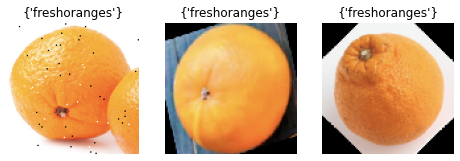

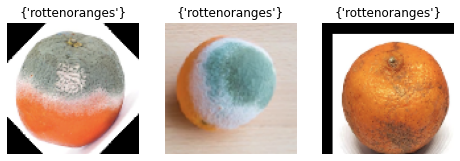

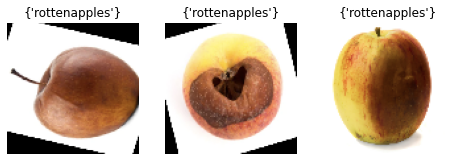

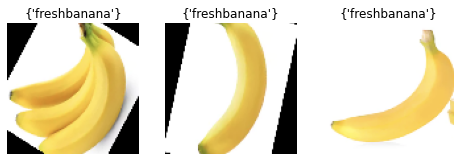

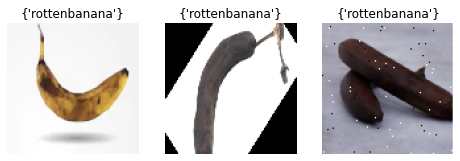

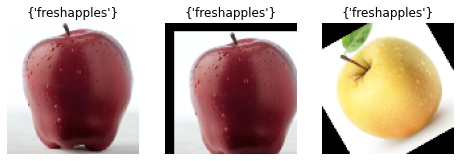

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
%matplotlib inline

def plot_image(image_file):
  image_path = [file for file in os.listdir('{}/{}'.format(dataset_train_dir, image_file))]
  select_image = np.random.choice(image_path, 3, replace = False)

  fig = plt.figure(figsize = (8,6))
  for i in range(3):
    if i < 3:
      image_select = '{}/{}/{}'.format(dataset_train_dir, image_file, select_image[i])
      label = {image_file}

    ax = fig.add_subplot(1,3,i+1)

    image_show = image.load_img(image_select, target_size = (100,100))
    plt.imshow(image_show)
    plt.title(label)
    plt.axis('off')
  plt.show()

for fruit_classification in list_train_dataset:
  plot_image(fruit_classification)

In [ ]:
def create_dir(PATH):
  if not os.path.exists(PATH):
    os.mkdir(PATH)
    return PATH
  else:
    shutil.rmtree(PATH)
    os.mkdir(PATH)
    return PATH

In [ ]:
try:
  base_dir = '/content/'
  fruit_dir = create_dir(os.path.join(base_dir, 'fruits-fresh-and-rotten-for-classification'))
  train_dir = create_dir(os.path.join(fruit_dir, 'train'))
  validation_dir = create_dir(os.path.join(fruit_dir, 'val'))
  test_dir = create_dir(os.path.join(fruit_dir, 'test'))

  train_fresh_dir = create_dir(os.path.join(train_dir, 'fresh fruit'))
  train_rotten_dir = create_dir(os.path.join(train_dir, 'rotten fruit'))

  validation_fresh_dir = create_dir(os.path.join(validation_dir, 'fresh fruit'))
  validation_rotten_dir = create_dir(os.path.join(validation_dir, 'rotten fruit'))

  test_fresh_dir = create_dir(os.path.join(test_dir, 'fresh fruit'))
  test_rotten_dir = create_dir(os.path.join(test_dir, 'rotten fruit'))

except OSError:
  pass

In [ ]:
import random
from PIL import Image
from shutil import copyfile

def split_data(SOURCE_TRAIN, SOURCE_TEST, TRAINING, VALIDATION, TEST):
  data_train = os.listdir(SOURCE_TRAIN)
  data_test = os.listdir(SOURCE_TEST)
  
  data_random_train = random.sample(data_train, len(data_train))
  data_random_test = random.sample(data_test, len(data_test))

  split_data_train_and_val = 0.9
  split_data_test_and_val = 0.9

  train_size = len(data_train) * split_data_train_and_val
  val_size = len(data_test) * split_data_test_and_val

  for i, image_name in enumerate(data_random_train):
    image_path = os.path.join(SOURCE_TRAIN, image_name)
    if os.path.getsize(image_path) > 0:
      if i < train_size:
        copyfile(image_path, os.path.join(TRAINING, image_name))
      else:
        copyfile(image_path, os.path.join(VALIDATION, image_name))
  
  for i, image_name in enumerate(data_random_test):
    image_path = os.path.join(SOURCE_TEST, image_name)
    if os.path.getsize(image_path) > 0:
      if i < val_size:
        copyfile(image_path, os.path.join(VALIDATION, image_name))
      else:
        copyfile(image_path, os.path.join(TEST, image_name))

In [ ]:
# List Alamat Fruit Classification di dalam direktori Dataset Train
fruit_classification_train_dataset_dir = {}
for fruit_classification in list_train_dataset:
  fruit_classification_train_dataset_dir.update({'{}'.format(fruit_classification) : '{}'.format(os.path.join(dataset_train_dir, fruit_classification))})

print('Addres of Fruit Classification in Train Dataset :')
for key, val in fruit_classification_train_dataset_dir.items():
  print('{} : {}'.format(key, val))

Addres of Fruit Classification in Train Dataset :
freshoranges : /tmp/dataset/train/freshoranges
rottenoranges : /tmp/dataset/train/rottenoranges
rottenapples : /tmp/dataset/train/rottenapples
freshbanana : /tmp/dataset/train/freshbanana
rottenbanana : /tmp/dataset/train/rottenbanana
freshapples : /tmp/dataset/train/freshapples


In [ ]:
# List Alamat Fruit Classification di dalam direktori Dataset Test
fruit_classification_test_dataset_dir = {}
for fruit_classification in list_train_dataset:
  fruit_classification_test_dataset_dir.update({'{}'.format(fruit_classification) : '{}'.format(os.path.join(dataset_test_dir, fruit_classification))})

print('Addres of Fruit Classification in Test Dataset :')
for key, val in fruit_classification_test_dataset_dir.items():
  print('{} : {}'.format(key, val))

Addres of Fruit Classification in Test Dataset :
freshoranges : /tmp/dataset/test/freshoranges
rottenoranges : /tmp/dataset/test/rottenoranges
rottenapples : /tmp/dataset/test/rottenapples
freshbanana : /tmp/dataset/test/freshbanana
rottenbanana : /tmp/dataset/test/rottenbanana
freshapples : /tmp/dataset/test/freshapples


In [ ]:
list_fresh_fruit = ['freshapples', 'freshbanana', 'freshoranges']
for fresh_fruit in list_fresh_fruit:
  split_data(
      fruit_classification_train_dataset_dir[fresh_fruit],
      fruit_classification_test_dataset_dir[fresh_fruit],
      train_fresh_dir,
      validation_fresh_dir,
      test_fresh_dir
  )

In [ ]:
list_rotten_fruit = ['rottenapples', 'rottenbanana', 'rottenoranges']
for rotten_fruit in list_rotten_fruit:
  split_data(
      fruit_classification_train_dataset_dir[rotten_fruit],
      fruit_classification_test_dataset_dir[rotten_fruit],
      train_rotten_dir,
      validation_rotten_dir,
      test_rotten_dir
  )

In [ ]:
list_fruit_classification = ['fresh fruit', 'rotten fruit']

for fruit_classification in list_fruit_classification:
  print('There are {} files of {} in train dir'.format(total_num_files(train_dir, fruit_classification), fruit_classification))
  print('There are {} files of {} in validation dir'.format(total_num_files(validation_dir, fruit_classification), fruit_classification))
  print('There are {} files of {} in test dir'.format(total_num_files(test_dir, fruit_classification), fruit_classification))

There are 4267 files of fresh fruit in train dir
There are 1522 files of fresh fruit in validation dir
There are 115 files of fresh fruit in test dir
There are 5546 files of rotten fruit in train dir
There are 1996 files of rotten fruit in validation dir
There are 153 files of rotten fruit in test dir


In [ ]:
import tensorflow as tf
print('Using TensorFlow Version:', tf.__version__)

Using TensorFlow Version: 2.8.2


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale = 1.0/255.0,
    rotation_range = 40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

val_datagen = ImageDataGenerator(
    rescale = 1.0/255.0,
    rotation_range = 40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

test_datagen = ImageDataGenerator(
    rescale = 1.0 / 255.0,
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (128, 128),
    batch_size = 32,
    class_mode = 'binary'
)

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size = (128, 128),
    batch_size = 32,
    class_mode = 'binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    batch_size = 32,
    target_size = (128, 128),
    class_mode = 'binary'
)

Found 9813 images belonging to 2 classes.
Found 3518 images belonging to 2 classes.
Found 268 images belonging to 2 classes.


In [ ]:
print('Class Indices in Train Generator : {}'.format(train_generator.class_indices))
print('Class Indices in Validation Generator : {}'.format(val_generator.class_indices))
print('Class Indices in Test Generator : {}'.format(test_generator.class_indices))

Class Indices in Train Generator : {'fresh fruit': 0, 'rotten fruit': 1}
Class Indices in Validation Generator : {'fresh fruit': 0, 'rotten fruit': 1}
Class Indices in Test Generator : {'fresh fruit': 0, 'rotten fruit': 1}


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.99 and logs.get('val_accuracy') > 0.99):
      self.model.stop_training = True
      print('\nThe accuracy of the training and validation has reached > 99%')
callbacks = myCallback()

In [ ]:
from keras import callbacks
from keras.callbacks import ModelCheckpoint
earlystop = callbacks.EarlyStopping(
    monitor = 'val_loss',
    mode = 'min', patience = 20,
    restore_best_weights = True
)

In [ ]:
# Hasil Transfer Learning dengan MobileNetV2
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam

# MobileNetV2
pre_trained_model = MobileNetV2(
    input_shape = (128, 128, 3),
    include_top = False,
    weights = 'imagenet'
)

for layer in pre_trained_model.layers:
  layer.trainable = False

x = layers.Flatten()(pre_trained_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)           
x = layers.Dense(1, activation='sigmoid')(x)

model = Model(pre_trained_model.input, x) 

model.summary()

9420800/9406464 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)             

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer = 'Adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
# Menghitung jumlah file training, validation, test
total_train_file = 0
total_val_file = 0
total_test_file = 0

for fruit_classification in list_fruit_classification:
  total_train_file += len(os.listdir(os.path.join(train_dir, fruit_classification)))
  total_val_file += len(os.listdir(os.path.join(validation_dir, fruit_classification)))
  total_test_file += len(os.listdir(os.path.join(test_dir, fruit_classification)))

print("There are {} files in training directory".format(total_train_file))
print("There are {} files in validation directory".format(total_val_file))
print("There are {} files in test directory".format(total_test_file))

There are 9813 files in training directory
There are 3518 files in validation directory
There are 268 files in test directory


In [ ]:
modelcheck = ModelCheckpoint('fresh_and_rotten_fruit_model.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

In [ ]:
# Hasil Edit History berdasarkan perubahan Steps per epoch
history = model.fit(
    train_generator,
    steps_per_epoch = (total_train_file / 32),
    epochs = 100,
    validation_data = val_generator,
    validation_steps = (total_val_file / 32),
    callbacks = [earlystop, modelcheck],
    verbose = 1
)

Epoch 1/100
307/306 [==============================] - ETA: 0s - loss: 0.4474 - accuracy: 0.9375
Epoch 1: val_accuracy improved from -inf to 0.97072, saving model to fresh_and_rotten_fruit_model.h5
306/306 [==============================] - 226s 725ms/step - loss: 0.4474 - accuracy: 0.9375 - val_loss: 0.0870 - val_accuracy: 0.9707
Epoch 2/100
307/306 [==============================] - ETA: 0s - loss: 0.0782 - accuracy: 0.9693
Epoch 2: val_accuracy improved from 0.97072 to 0.97442, saving model to fresh_and_rotten_fruit_model.h5
306/306 [==============================] - 223s 728ms/step - loss: 0.0782 - accuracy: 0.9693 - val_loss: 0.0665 - val_accuracy: 0.9744
Epoch 3/100
307/306 [==============================] - ETA: 0s - loss: 0.0652 - accuracy: 0.9752
Epoch 3: val_accuracy improved from 0.97442 to 0.97982, saving model to fresh_and_rotten_fruit_model.h5
306/306 [==============================] - 253s 825ms/step - loss: 0.0652 - accuracy: 0.9752 - val_loss: 0.0514 - val_accuracy: 0.

In [ ]:
from keras.models import load_model
saved_model = load_model('fresh_and_rotten_fruit_model.h5')

<function matplotlib.pyplot.show>

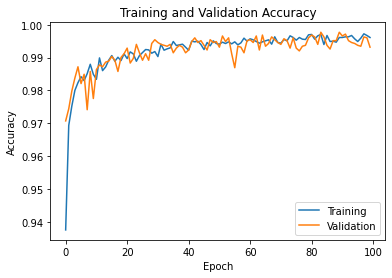

In [ ]:
import keras
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc = 'best')
plt.show

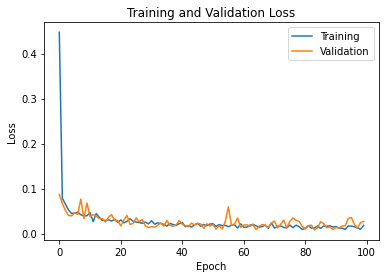

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc = 'best')
plt.show()

In [ ]:
# Test Model
print('Test Model')
loss, acc = model.evaluate(test_generator, steps = (total_test_file / 32), verbose = 1)
print('accuracy test : {} %'.format(acc * 100))
print('loss test : {} %'.format(loss * 100))

Test Model
8/8 [==============================] - 4s 423ms/step - loss: 0.0261 - accuracy: 0.9925
accuracy test : 99.25373196601868 %
loss test : 2.611146867275238 %


Saving fresh-banana-500x500.jpg to fresh-banana-500x500.jpg


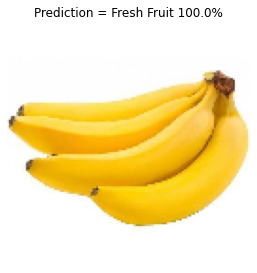

In [ ]:
from tensorflow.keras.utils import get_file
from keras.preprocessing import image
from google.colab import files
import pathlib
import cv2

model_predict = tf.keras.models.load_model('fresh_and_rotten_fruit_model.h5')
model_predict.compile(
    optimizer='Adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

image_upload = files.upload()
image_filename = []
image_prediction = []
prediction_result = []

for image_path in image_upload.keys():
  test_images = image.load_img(image_path, color_mode="rgb", target_size=(128, 128), interpolation="nearest")
  test_images = image.img_to_array(test_images)
  test_images = np.expand_dims(test_images, axis=0)
  test_images = test_images/255

  images = np.vstack([test_images])
  classes = model_predict.predict(images, batch_size=32)
  prediction_classes = np.where(classes[0] > 0.5, 1,0)
  if prediction_classes == 0:
    image_filename.append(image_path)
    image_prediction.append(1.0 - classes[0])
    prediction_result.append('Fresh Fruit')
  else:
    image_filename.append(image_path)
    image_prediction.append(classes[0])
    prediction_result.append('Rotten Fruit')

plt.figure(figsize=(20, 20))
for image_test in range(len(image_filename)):
  plt.subplot((len(image_filename)/4)+1, 4, image_test+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image.load_img(image_filename[image_test], color_mode="rgb", target_size=(128, 128), interpolation="nearest"))
  title = 'Prediction = {} {}%'.format(prediction_result[image_test], round(float(image_prediction[image_test])*100, 2))
  if prediction_result[image_test] == 'Fresh Fruit':
    plt.title(title, color='black')
  else:
    plt.title(title, color='red')

  plt.axis('off')
plt.show()

for fn in image_filename:
  os.system(f'rm {fn}')

In [ ]:
%cd /content/gdrive/MyDrive/Capstone_Project/fresh_and_rotten_fruit_classification_MobileNetV2_with_Image_Augmentation

/content/gdrive/MyDrive/Capstone_Project/fresh_and_rotten_fruit_classification_MobileNetV2_with_Image_Augmentation


In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}

INFO:tensorflow:Assets written to: /tmp/1/assets

export_path = /tmp/1
total 2844
drwxr-xr-x 2 root root    4096 Jun  4 08:03 assets
-rw-r--r-- 1 root root  351011 Jun  4 08:03 keras_metadata.pb
-rw-r--r-- 1 root root 2549770 Jun  4 08:03 saved_model.pb
drwxr-xr-x 2 root root    4096 Jun  4 08:03 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
tflite_converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
tflite_converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = tflite_converter.convert()

# Write TFLite model
tflite_model_file = 'fresh_and_rotten_fruit_model.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('fresh_and_rotten_fruit_model.txt', 'w') as f:
    f.write('\n'.join(list_fruit_classification))

In [ ]:
# Save the trained model as a Keras HDF5 file. 
saved_model_path = "./fresh_and_rotten_fruit_model.h5"
model.save(saved_model_path)

In [ ]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Use the tensorflow.js converter to convert the saved Keras model into JSON format.
!tensorflowjs_converter --input_format=keras {saved_model_path} ./modeljs

In [ ]:
!zip -r /content/gdrive/MyDrive/Capstone_Project/fresh_and_rotten_fruit_classification_MobileNetV2_with_Image_Augmentation/modeljs.zip /content/gdrive/MyDrive/Capstone_Project/fresh_and_rotten_fruit_classification_MobileNetV2_with_Image_Augmentation/modeljs

  adding: content/gdrive/MyDrive/Capstone_Project/fresh_and_rotten_fruit_classification_MobileNetV2_with_Image_Augmentation/modeljs/ (stored 0%)
  adding: content/gdrive/MyDrive/Capstone_Project/fresh_and_rotten_fruit_classification_MobileNetV2_with_Image_Augmentation/modeljs/group1-shard1of23.bin (deflated 7%)
  adding: content/gdrive/MyDrive/Capstone_Project/fresh_and_rotten_fruit_classification_MobileNetV2_with_Image_Augmentation/modeljs/group1-shard2of23.bin (deflated 7%)
  adding: content/gdrive/MyDrive/Capstone_Project/fresh_and_rotten_fruit_classification_MobileNetV2_with_Image_Augmentation/modeljs/group1-shard3of23.bin (deflated 7%)
  adding: content/gdrive/MyDrive/Capstone_Project/fresh_and_rotten_fruit_classification_MobileNetV2_with_Image_Augmentation/modeljs/group1-shard4of23.bin (deflated 7%)
  adding: content/gdrive/MyDrive/Capstone_Project/fresh_and_rotten_fruit_classification_MobileNetV2_with_Image_Augmentation/modeljs/group1-shard5of23.bin (deflated 7%)
  adding: conte

In [ ]:
!zip -r /content/fruits-fresh-and-rotten-for-classification.zip /content/fruits-fresh-and-rotten-for-classification

Streaming output truncated to the last 5000 lines.
  adding: content/fruits-fresh-and-rotten-for-classification/train/fresh fruit/rotated_by_45_Screen Shot 2018-06-08 at 5.25.22 PM.png (deflated 5%)
  adding: content/fruits-fresh-and-rotten-for-classification/train/fresh fruit/rotated_by_30_Screen Shot 2018-06-12 at 10.06.07 PM.png (deflated 3%)
  adding: content/fruits-fresh-and-rotten-for-classification/train/fresh fruit/translation_Screen Shot 2018-06-08 at 5.04.05 PM.png (deflated 2%)
  adding: content/fruits-fresh-and-rotten-for-classification/train/fresh fruit/saltandpepper_Screen Shot 2018-06-12 at 11.51.13 PM.png (deflated 2%)
  adding: content/fruits-fresh-and-rotten-for-classification/train/fresh fruit/saltandpepper_Screen Shot 2018-06-12 at 9.47.46 PM.png (deflated 3%)
  adding: content/fruits-fresh-and-rotten-for-classification/train/fresh fruit/Screen Shot 2018-06-13 at 12.06.59 AM.png (deflated 0%)
  adding: content/fruits-fresh-and-rotten-for-classification/train/fresh f

In [ ]:
import shutil
import os

source = r'/content/fruits-fresh-and-rotten-for-classification.zip'
destination = r'/content/gdrive/MyDrive/Capstone_Project/Dataset/fruits-fresh-and-rotten-for-classification.zip'

shutil.copyfile(source, destination)

'/content/gdrive/MyDrive/Capstone_Project/Dataset/fruits-fresh-and-rotten-for-classification.zip'

In [ ]:
try:
    files.download('/content/fruits-fresh-and-rotten-for-classification.zip')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
try:
    files.download('fresh_and_rotten_fruit_model.h5')
    files.download('fresh_and_rotten_fruit_model.tflite')
    files.download('fresh_and_rotten_fruit_model.txt')
    files.download('modeljs.zip')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>